# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from citipy import citipy
from random import uniform

# Import API key
from api_keys import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
now = datetime.datetime.now()

## Generate Cities List

In [2]:
#List for latitude_longitude and cities
lat_lngs = []
cities = []

#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Identify closest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a the cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Creating base URL and empty dataframe
url = f'https://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units=imperial&q='
data_df = pd.DataFrame({'City':[],
                        'Cloudiness(%)':[],
                        'Country':[],
                        'Date':[],
                        'Humidity(%)':[],
                        'Lat':[],
                        'Lng':[],
                        'Temperature(F)':[],
                        'Wind_speed(mph)':[]
                       })

In [4]:
#API request for each city and adding to dataframe within a loop
i = 0
for city in cities:    
    response_req = requests.get(url+city)
    response = response_req.json()

    if (response['cod'] == 200):
        i = i+1
        print(f'Processing Record {i} | {city}')
        print(response_req.url)

        data_df.loc[i,'City'] = city
        data_df.loc[i,'Cloudiness(%)'] = response['clouds']['all']
        data_df.loc[i,'Country'] = response['sys']['country']
        data_df.loc[i,'Date'] = now.strftime("%Y-%m-%d") 
        data_df.loc[i,'Humidity(%)'] = response['main']['humidity']
        data_df.loc[i,'Lat'] = response['coord']['lat']
        data_df.loc[i,'Lng'] = response['coord']['lon']
        data_df.loc[i,'Temperature(F)'] = response['main']['temp_max']
        data_df.loc[i,'Wind_speed(mph)'] = response['wind']['speed']
    else:
        print('City not found. Skipping')
            
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Processing Record 1 | goderich
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=goderich
Processing Record 2 | sobolevo
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=sobolevo
Processing Record 3 | taft
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=taft
Processing Record 4 | hobart
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=hobart
Processing Record 5 | hamilton
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=hamilton
Processing Record 6 | georgetown
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=georgetown
Processing Record 7 | namtsy
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=namtsy
Proc

Processing Record 57 | mount pleasant
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=mount%20pleasant
Processing Record 58 | hermanus
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=hermanus
Processing Record 59 | castro
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=castro
Processing Record 60 | kavaratti
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=kavaratti
Processing Record 61 | cabo san lucas
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=cabo%20san%20lucas
Processing Record 62 | cidreira
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=cidreira
Processing Record 63 | ostrovnoy
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4

Processing Record 113 | dikson
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=dikson
Processing Record 114 | aktau
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=aktau
Processing Record 115 | kamen-rybolov
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=kamen-rybolov
Processing Record 116 | conde
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=conde
Processing Record 117 | katherine
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=katherine
Processing Record 118 | shebunino
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=shebunino
City not found. Skipping
Processing Record 119 | hithadhoo
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4

Processing Record 168 | yulara
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=yulara
Processing Record 169 | sola
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=sola
Processing Record 170 | erenhot
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=erenhot
Processing Record 171 | banda aceh
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=banda%20aceh
Processing Record 172 | saldanha
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=saldanha
Processing Record 173 | xining
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=xining
City not found. Skipping
Processing Record 174 | haines junction
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d423

Processing Record 222 | hay river
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=hay%20river
Processing Record 223 | airai
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=airai
Processing Record 224 | tessalit
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=tessalit
Processing Record 225 | scottsbluff
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=scottsbluff
Processing Record 226 | lazurne
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=lazurne
Processing Record 227 | thinadhoo
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=thinadhoo
Processing Record 228 | dabakala
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&

Processing Record 277 | fare
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=fare
Processing Record 278 | pulsano
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=pulsano
Processing Record 279 | neryungri
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=neryungri
Processing Record 280 | daru
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=daru
Processing Record 281 | wanlaweyn
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=wanlaweyn
Processing Record 282 | ranong
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=ranong
Processing Record 283 | khandyga
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=khand

Processing Record 333 | biak
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=biak
Processing Record 334 | washougal
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=washougal
Processing Record 335 | wheeling
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=wheeling
Processing Record 336 | abha
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=abha
Processing Record 337 | beringovskiy
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=beringovskiy
Processing Record 338 | semnan
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=semnan
Processing Record 339 | geraldton
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperia

City not found. Skipping
Processing Record 388 | kargasok
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=kargasok
Processing Record 389 | luwuk
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=luwuk
Processing Record 390 | nabire
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=nabire
Processing Record 391 | quatre cocos
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=quatre%20cocos
Processing Record 392 | vallenar
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=vallenar
City not found. Skipping
Processing Record 393 | naukot
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=naukot
Processing Record 394 | sistranda
https://api.openweathermap.org/data/2.5/weat

Processing Record 443 | chenzhou
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=chenzhou
Processing Record 444 | yerky
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=yerky
Processing Record 445 | dingle
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=dingle
Processing Record 446 | rawson
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=rawson
Processing Record 447 | ust-kuyga
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=ust-kuyga
Processing Record 448 | yumen
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=yumen
Processing Record 449 | aden
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=aden
Proc

Processing Record 499 | aswan
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=aswan
Processing Record 500 | cockburn town
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=cockburn%20town
Processing Record 501 | karmala
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=karmala
Processing Record 502 | tarko-sale
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=tarko-sale
Processing Record 503 | praia
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=praia
Processing Record 504 | colares
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&units=imperial&q=colares
Processing Record 505 | porto novo
https://api.openweathermap.org/data/2.5/weather?APPID=78abb4ff3bca4d4230f3d8c4b465ef3c&un

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Display count of dataframe fields
data_df.count()

City               546
Cloudiness(%)      546
Country            546
Date               546
Humidity(%)        546
Lat                546
Lng                546
Temperature(F)     546
Wind_speed(mph)    546
dtype: int64

In [6]:
#Print dataframe
data_df.head()

,City,Cloudiness(%),Country,Date,Humidity(%),Lat,Lng,Temperature(F),Wind_speed(mph)
1,goderich,48.0,CA,2019-03-06,83.0,43.74,-81.71,16.00,5.01
2,sobolevo,20.0,RU,2019-03-06,74.0,54.43,31.90,9.80,8.99
3,taft,0.0,PH,2019-03-06,92.0,11.90,125.42,78.79,10.22
4,hobart,40.0,AU,2019-03-06,50.0,-42.88,147.33,57.99,12.75
5,hamilton,20.0,BM,2019-03-06,63.0,32.30,-64.78,63.00,26.40


In [7]:
#Save data to a CSV file
data_df.to_csv("API_Homework_Analysis/City_Data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

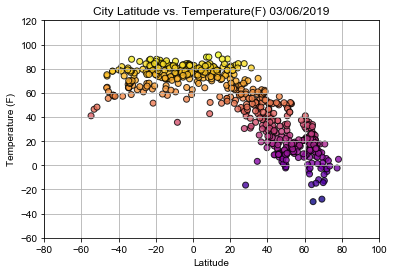

In [8]:
#Build a scatter plot for Latitude vs. Max Temperature

plt.scatter(data_df["Lat"], 
            data_df["Temperature(F)"], c=data_df["Temperature(F)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

#Add graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Temperature(F) {now.strftime('%m/%d/%Y')}")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

#Save the graph
plt.savefig("API_Homework_Analysis/Latitude_Temperature.png")

#Show plot
plt.show()

#### Latitude vs. Humidity Plot

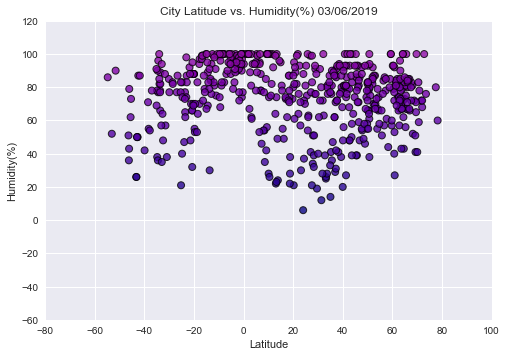

In [9]:
#Build a scatter plot for Humidity vs. Max Temperature

plt.scatter(data_df["Lat"], 
            data_df["Humidity(%)"], c=data_df["Humidity(%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

#Add graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity(%) {now.strftime('%m/%d/%Y')}")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

#Save graph
plt.savefig("API_Homework_Analysis/Latitude_Humidity.png")

#Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

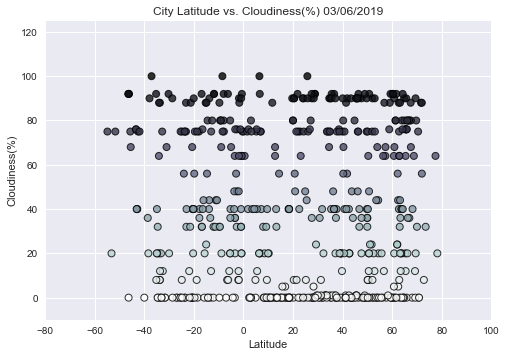

In [10]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(data_df["Lat"], 
            data_df["Cloudiness(%)"], c=data_df["Cloudiness(%)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='bone_r', alpha=0.8, label="City")

#Add graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness(%) {now.strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

#Save graph
plt.savefig("API_Homework_Analysis/Latitude_Cloudiness.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

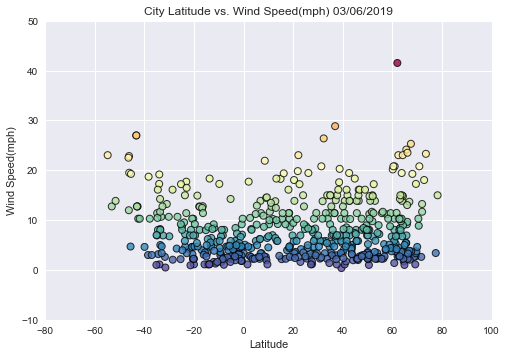

In [11]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(data_df["Lat"], 
            data_df["Wind_speed(mph)"], c=data_df["Wind_speed(mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='Spectral_r', alpha=0.8, label="City")

#Add graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed(mph) {now.strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

#Save graph
plt.savefig("API_Homework_Analysis/Latitude_WindSpeed.png")

#Show plot
plt.show()